In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from PIL import Image
import random
import numpy as np
import shutil

sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("images.csv")
df.head(20)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,100.jpg,213.0,237.0,reliance,25.0,65.0,71.0,116.0
1,101.jpg,282.0,178.0,reliance,103.0,14.0,129.0,45.0
2,102.jpg,301.0,167.0,reliance,1.0,58.0,75.0,130.0
3,103.jpg,260.0,194.0,reliance,92.0,7.0,113.0,24.0
4,104.jpg,299.0,168.0,reliance,104.0,67.0,127.0,88.0
5,105.jpg,246.0,205.0,reliance,170.0,79.0,191.0,107.0
6,106.jpg,300.0,168.0,reliance,102.0,1.0,127.0,10.0
7,107.jpg,275.0,183.0,reliance,123.0,59.0,139.0,86.0
8,108.jpg,301.0,167.0,reliance,210.0,66.0,221.0,72.0
9,109.jpg,100.0,100.0,reliance,81.0,21.0,94.0,31.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  6720 non-null   object 
 1   width     6720 non-null   float64
 2   height    6720 non-null   float64
 3   class     6720 non-null   object 
 4   xmin      6720 non-null   float64
 5   ymin      6720 non-null   float64
 6   xmax      6720 non-null   float64
 7   ymax      6720 non-null   float64
dtypes: float64(6), object(2)
memory usage: 420.1+ KB


In [4]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,100.jpg,213.0,237.0,reliance,25.0,65.0,71.0,116.0
1,101.jpg,282.0,178.0,reliance,103.0,14.0,129.0,45.0
2,102.jpg,301.0,167.0,reliance,1.0,58.0,75.0,130.0
3,103.jpg,260.0,194.0,reliance,92.0,7.0,113.0,24.0
4,104.jpg,299.0,168.0,reliance,104.0,67.0,127.0,88.0


In [5]:
percentage_test = 0.1
i = 0
image_file_path = "images"
for _ in glob.glob(f"{image_file_path}/*.jpg"):
    i += 1
print(f"Total images {i}")

Total images 4390


In [6]:
test_images = round(i*percentage_test)


#### We can directly takes random images train files given test percentage 
        In this methode in small number of classes it work well but it lager it fails
        based on my exprience i have face this issue it don't takes all this class. 
        When we validation(evalutaion) some classes give me nan values it take 3 days
        for me why my model predicting nan values some classes but model performe well 
        even nan classes it predicting well.

In [7]:
tota_class = len(df['class'].unique())
times_run = test_images//tota_class
times_run

15

##### "times_run"  it peak 15 images in each class

In [8]:
groups = [df for _, df in df.groupby(['class','filename'])]
df_class = pd.concat(groups).reset_index(drop=True)
df_class.head(30)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,1230939811.jpg,375.0,500.0,Adidas,129.0,326.0,257.0,423.0
1,1230939811.jpg,375.0,500.0,Adidas,137.0,336.0,243.0,395.0
2,144503924.jpg,280.0,210.0,Adidas,38.0,12.0,234.0,142.0
3,145074777.jpg,500.0,375.0,Adidas,22.0,52.0,471.0,326.0
4,2403699729.jpg,500.0,375.0,Adidas,27.0,5.0,342.0,244.0
5,2450743885.jpg,500.0,375.0,Adidas,49.0,13.0,305.0,191.0
6,2451569770.jpg,500.0,375.0,Adidas,242.0,208.0,413.0,331.0
7,2534155497.jpg,500.0,375.0,Adidas,59.0,1.0,479.0,253.0
8,2550056374.jpg,500.0,413.0,Adidas,18.0,2.0,488.0,278.0
9,2553832700.jpg,500.0,356.0,Adidas,4.0,5.0,499.0,352.0


In [9]:
df_class.loc[df_class["class"]=="Adidas"]

,filename,width,height,class,xmin,ymin,xmax,ymax
0,1230939811.jpg,375.0,500.0,Adidas,129.0,326.0,257.0,423.0
1,1230939811.jpg,375.0,500.0,Adidas,137.0,336.0,243.0,395.0
2,144503924.jpg,280.0,210.0,Adidas,38.0,12.0,234.0,142.0
3,145074777.jpg,500.0,375.0,Adidas,22.0,52.0,471.0,326.0
4,2403699729.jpg,500.0,375.0,Adidas,27.0,5.0,342.0,244.0
...,...,...,...,...,...,...,...,...
345,aug_3_4763847308.jpg,500.0,465.0,Adidas,5.0,164.0,33.0,199.0
346,aug_3_4763847308.jpg,500.0,465.0,Adidas,317.0,46.0,360.0,100.0
347,aug_3_4763847308.jpg,500.0,465.0,Adidas,2.0,50.0,37.0,86.0
348,aug_3_7787186.jpg,500.0,375.0,Adidas,67.0,100.0,440.0,359.0


In [10]:
%%time

src_path = "images"
test_df = pd.DataFrame(columns=df_class.columns)
train_df = pd.DataFrame(columns=df.columns)
train_images_path = 'split/train'
test_images_path = 'split/test'
os.makedirs(train_images_path,exist_ok=True)
os.makedirs(test_images_path,exist_ok=True)


for image_class_name in list(df_class['class'].unique()):
    df_class_name = df_class.loc[df_class["class"] == image_class_name]
    
    for _ in range(times_run):
        
        random_images_name = random.choice(list(df_class_name["filename"].unique()))
        dataframe_random_images = df_class_name.loc[df_class_name['filename'] == random_images_name]
        df_class_name = df_class_name.drop(df_class_name.loc[df_class_name['filename'] == random_images_name].index)
        
        test_df = pd.concat([test_df,dataframe_random_images])
        shutil.copy(os.path.join(src_path,random_images_name),os.path.join(test_images_path,random_images_name))
    
    train_df = pd.concat([train_df,df_class_name])

for image_name in list(train_df["filename"].unique()):
    shutil.copy(os.path.join(src_path,image_name),os.path.join(train_images_path,image_name))


Wall time: 39 s


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6085 entries, 0 to 6719
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  6085 non-null   object 
 1   width     6085 non-null   float64
 2   height    6085 non-null   float64
 3   class     6085 non-null   object 
 4   xmin      6085 non-null   float64
 5   ymin      6085 non-null   float64
 6   xmax      6085 non-null   float64
 7   ymax      6085 non-null   float64
dtypes: float64(6), object(2)
memory usage: 427.9+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 287 to 6538
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  635 non-null    object 
 1   width     635 non-null    float64
 2   height    635 non-null    float64
 3   class     635 non-null    object 
 4   xmin      635 non-null    float64
 5   ymin      635 non-null    float64
 6   xmax      635 non-null    float64
 7   ymax      635 non-null    float64
dtypes: float64(6), object(2)
memory usage: 44.6+ KB


#### Orignal  classs distribution

In [ ]:
sns.set(rc={'figure.figsize':(11.7,4.5)})
class_df = pd.DataFrame(pd.value_counts(df['class']))
class_df['class_name'] = class_df.index
sns.barplot(x="class_name",y='class',data=class_df)
plt.xticks(rotation=70)
plt.show()

#### Train dataset distribution

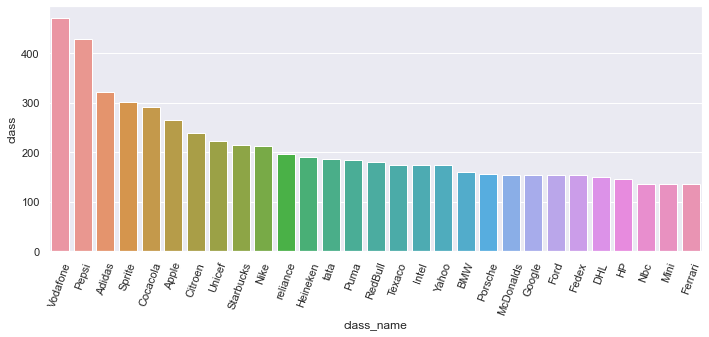

In [17]:
sns.set(rc={'figure.figsize':(11.7,4.5)})
class_df = pd.DataFrame(pd.value_counts(train_df['class']))
class_df['class_name'] = class_df.index
sns.barplot(x="class_name",y='class',data=class_df)
plt.xticks(rotation=70)
plt.show()

#### Test dataset distribution

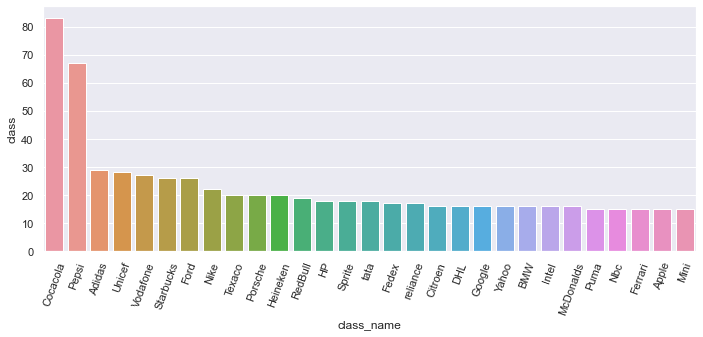

In [18]:
sns.set(rc={'figure.figsize':(11.7,4.5)})
class_df = pd.DataFrame(pd.value_counts(test_df['class']))
class_df['class_name'] = class_df.index
sns.barplot(x="class_name",y='class',data=class_df)
plt.xticks(rotation=70)
plt.show()

### Check wheather i have correctly separately data or not

#### Training dataset and train images dir

In [19]:

total = 0
for img_ in glob.glob(f"{train_images_path}/*.jpg"):
    img_name = os.path.basename(img_)
    
    if img_name not in train_df.values:
#         print(img_name)
        total += 1
print(f"The total image bounding box is not present dataset {total}")

The total image bounding box is not present dataset 0


#### Testing dataset and test image dir

In [20]:

total = 0
for img_ in glob.glob(f"{test_images_path}/*.jpg"):
    img_name = os.path.basename(img_)
    
    if img_name not in test_df.values:
        total += 1
print(f"The total image bounding box is not present dataset {total}")

The total image bounding box is not present dataset 0


### Dobule Check  

In [22]:
len(train_df['filename'].unique())


3957

In [23]:
len(df['filename'].unique())


4391

In [24]:
len(test_df['filename'].unique())


435

#### It give images which is not present each other dataset

In [25]:

total = 0
for img_ in glob.glob(f"{test_images_path}/*.jpg"):
    img_name = os.path.basename(img_)
    
    if img_name not in train_df.values:
#         print(img_name)
        total += 1
print(f"The total image bounding box is not present dataset {total}")

The total image bounding box is not present dataset 434


In [26]:
total = 0
for img_ in glob.glob(f"{train_images_path}/*.jpg"):
    img_name = os.path.basename(img_)
    
    if img_name not in test_df.values:
#         print(img_name)
        total += 1
print(f"The total image bounding box is not present dataset {total}")

The total image bounding box is not present dataset 3956


In [28]:
train_df.to_csv("train.csv",index=None)
test_df.to_csv("test.csv",index=None)

In [ ]:
os.remove("clean_data.csv")
os.remove("images.csv")
os.remove("concatenate.csv")
osreomv